In [107]:
#importacao das bibliotecas necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

#importacao e leitura dos arquivos para o python com pandas
titanic_treino = pd.read_csv('/content/drive/MyDrive/exercicio data/titanic/train.csv')
titanic_teste = pd.read_csv('/content/drive/MyDrive/exercicio data/titanic/test.csv')
titanic_submission = pd.read_csv('/content/drive/MyDrive/exercicio data/titanic/gender_submission.csv')

In [108]:
df = titanic_treino

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
# Verificando o DataFrame que estamos trabalhando
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [111]:
df.shape

(891, 12)

# Tratando missing values

In [112]:
# Verificando valores Ausentes
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [113]:
# Tratando os valores ausentes

# Preencher a idade ausente a partir da mediana com base a classe e sexo

df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

In [114]:
# Verificando os dados de Cabine
df['Cabin'].value_counts(dropna=False)

,count
Cabin,
NaN,687
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
...,...
E17,1
A24,1
C50,1


In [115]:
# Como mais de 70% dos dados de cabine estao ausentes, criarei uma variavel has_cabin e droparei a coluna Cabine, também  droparei a coluna nome e ticket
#porem posso voltar para verificar pois a coluna nome possui o titulo da pessoa ex: mr,lady que pode ser importante...
df['has_cabin'] = df['Cabin'].notnull().astype('int')
df = df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])


In [116]:
# Como embarked so possui dois valores ausentes, irei preencher com a moda (valor mais frequente)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [117]:
df2 = df.copy()

# Analise dos Dados

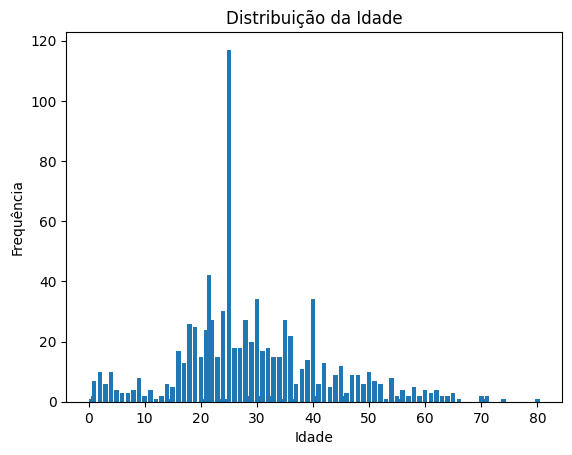

In [118]:
# Idade das pessoas no Titanic
x = titanic_treino["Age"].value_counts()
plt.bar(x.index, x.values)
plt.title("Distribuição da Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

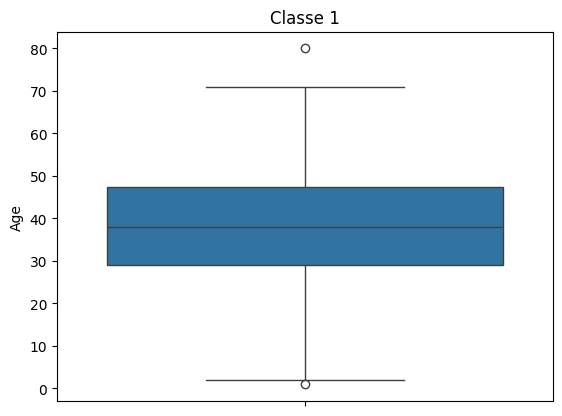

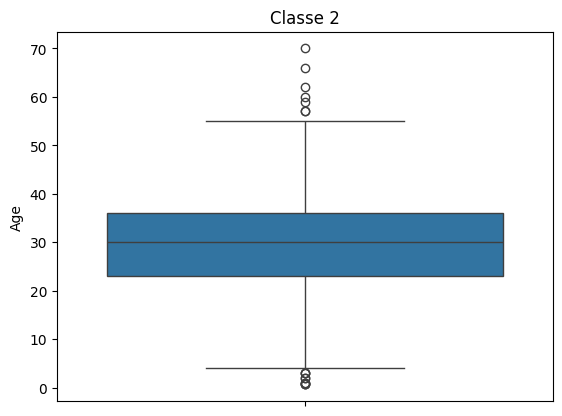

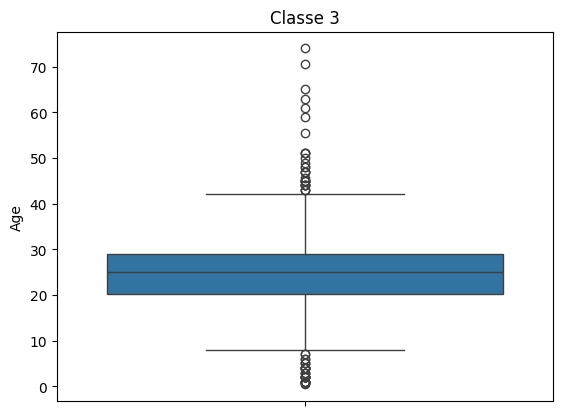

In [119]:
# Como a idade reflete na Classe
for i in range(1,4):
  db = titanic_treino[titanic_treino["Pclass"] == i]
  sns.boxplot(db["Age"])
  plt.title("Classe {}".format(i))
  plt.show()

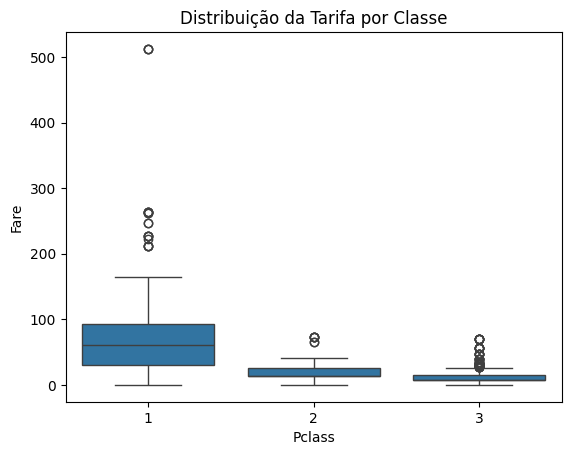

In [120]:
# Valor da entrada (Tarifa) por classe
sns.boxplot(x='Pclass', y='Fare', data=titanic_treino)
plt.title('Distribuição da Tarifa por Classe')
plt.show()

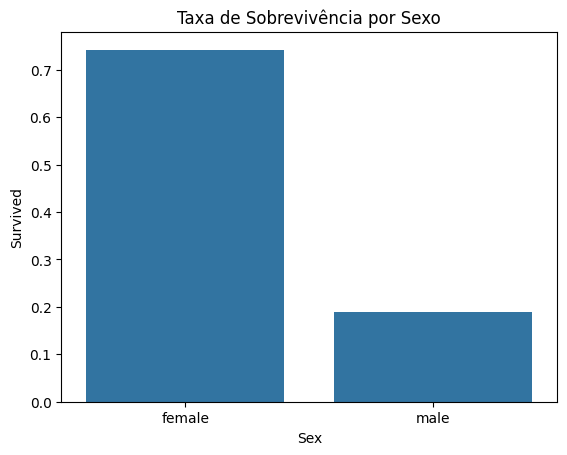

In [121]:
# Taxa de sobrevivencia por sexo
viveram_sexo = df.groupby('Sex')['Survived'].mean().reset_index()
sns.barplot(x='Sex', y='Survived', data=viveram_sexo)
plt.title('Taxa de Sobrevivência por Sexo')
plt.show()

# Convertendo dados categoricos para numericos

In [122]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [123]:
# Sex
df2['Sex'] = df2['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [124]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


In [125]:
# Embarked
df2['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [126]:
# Como temos tres valores, vou optar por usar metodo de one hot enconding
df2 = pd.get_dummies(df2, columns=['Embarked'], drop_first=True)
df2.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,has_cabin,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,False,True
1,1,1,1,38.0,1,0,71.2833,1,False,False
2,1,3,1,26.0,0,0,7.9250,0,False,True
3,1,1,1,35.0,1,0,53.1000,1,False,True
4,0,3,0,35.0,0,0,8.0500,0,False,True


# Dividindo dataset treino e teste

In [127]:
# Dividindo conjunto de dados em treino e teste para evitar overfitting e testar o modelo
X = df2.drop('Survived', axis=1)
y = df2['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [129]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


In [130]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.8212290502793296
Recall: 0.7567567567567568
Precision: 0.8
F1: 0.7777777777777778
AUC: 0.8835263835263836


In [131]:
# Performando a cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Divide o dataset em 5, stratified para manter a proporcao das classes (vivo, morto) em cada fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

score_metrics = ['roc_auc', 'accuracy', 'f1', 'recall', 'precision']

for metric in score_metrics:

    scores = cross_val_score(
        model,
        X,
        y,
        cv=skf,
        scoring=metric
    )

    print(f"{metric} - média: {scores.mean():.4f}")

    # Desempenho mais proximo do real

roc_auc - média: 0.8552
accuracy - média: 0.8047
f1 - média: 0.7352
recall - média: 0.7103
precision - média: 0.7634


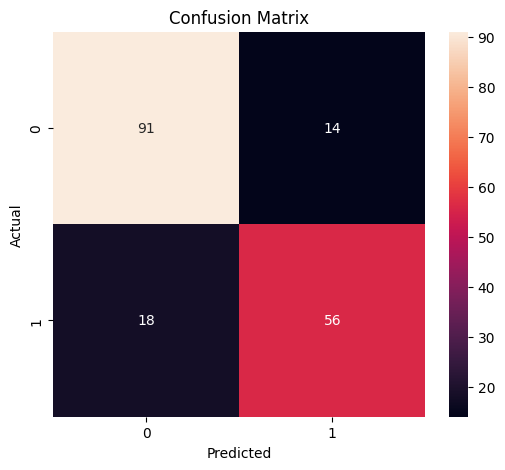

In [132]:
# Matrix de Confusao - 91 acertos de quem morreu, 56 acertos de quem viveu - 14 disse que morreu, mas viveu e 18 disse que viveu mas morreu
#tn fp
#fn tp
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

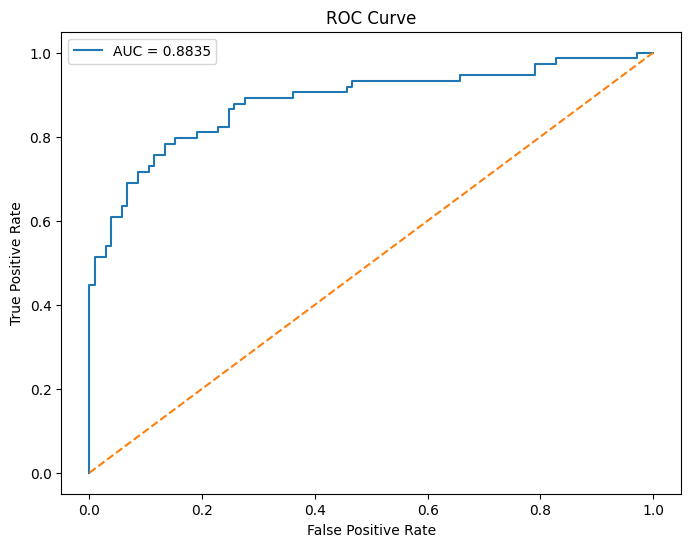

In [133]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [134]:
# Verificando se o modelo deu overfitting vendo a performance entre os dados de treino e teste ( Se a diferença for:< 5% → Normal /// 5%–10% → Atenção /// 10% → Provável overfitting )
# Score previsoes corretas / total de previsoes ( nao é boa sozinha pois se no dataset 90% das pessaos viveram se o modelo prever que todos viveram ele terá uma acuracia de 90%)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.8019662921348315
0.8212290502793296


In [135]:
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)

best_index = np.argmin(distances)

best_threshold = thresholds[best_index]

print("Melhor threshold:", best_threshold)
print("TPR:", tpr[best_index])
print("FPR:", fpr[best_index])

Melhor threshold: 0.4231635943501013
TPR: 0.7972972972972973
FPR: 0.1523809523809524


In [136]:
# podemos alterar o best_th para ir mais para o precision ou recall dependendo do caso
y_pred_new = (y_prob >= best_threshold).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print("Recall:", recall_score(y_test, y_pred_new))
print("Precision:", precision_score(y_test, y_pred_new))
print("F1:", f1_score(y_test, y_pred_new))

Accuracy: 0.8268156424581006
Recall: 0.7972972972972973
Precision: 0.7866666666666666
F1: 0.7919463087248322


In [137]:
# Importancia das variaveis no modelo
coef = pd.Series(model.coef_[0], index=X.columns)
coef = coef.sort_values()
coef


,0
Pclass,-0.815666
Embarked_S,-0.377393
SibSp,-0.307988
Embarked_Q,-0.201017
Parch,-0.118332
Age,-0.033945
Fare,0.001705
has_cabin,0.594457
Sex,2.580518


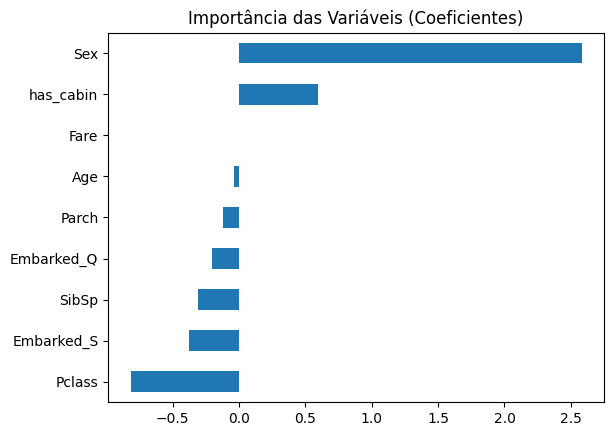

In [138]:
# Plotando o grafico
coef.sort_values().plot(kind='barh')
plt.title("Importância das Variáveis (Coeficientes)")
plt.show()


In [139]:
# Calcular as chances - odds - vemos que as mulheres tem 13x mais chances de viver neste caso
np.exp(coef)

,0
Pclass,0.442345
Embarked_S,0.685646
SibSp,0.734924
Embarked_Q,0.817899
Parch,0.888401
Age,0.966625
Fare,1.001707
has_cabin,1.812047
Sex,13.203977


E agora?

- Split dos dados antes de qualquer transformação para evitar que estatísticas do teste influenciem o treino (data leakage) - pipeline
 - Explorar mais Feature Engineering exemplo o nome Mr, Ms..., esta sozinho?
 - Treinar outros modelos para comparar, exemplo - Random Forest
 - Aplicação de escalonamento (padronização) nas variáveis numéricas Age e Fare


In [140]:
# Testes no modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [141]:
y_predict = model.predict(X_test)
y_predict_prob = model.predict_proba(X_test)[:,1]


In [142]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("F1:", f1_score(y_test, y_predict))
print("AUC:", roc_auc_score(y_test, y_predict_prob))

Accuracy: 0.8212290502793296
Recall: 0.7702702702702703
Precision: 0.7916666666666666
F1: 0.7808219178082192
AUC: 0.8956241956241957
